Đường đi tìm được: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]


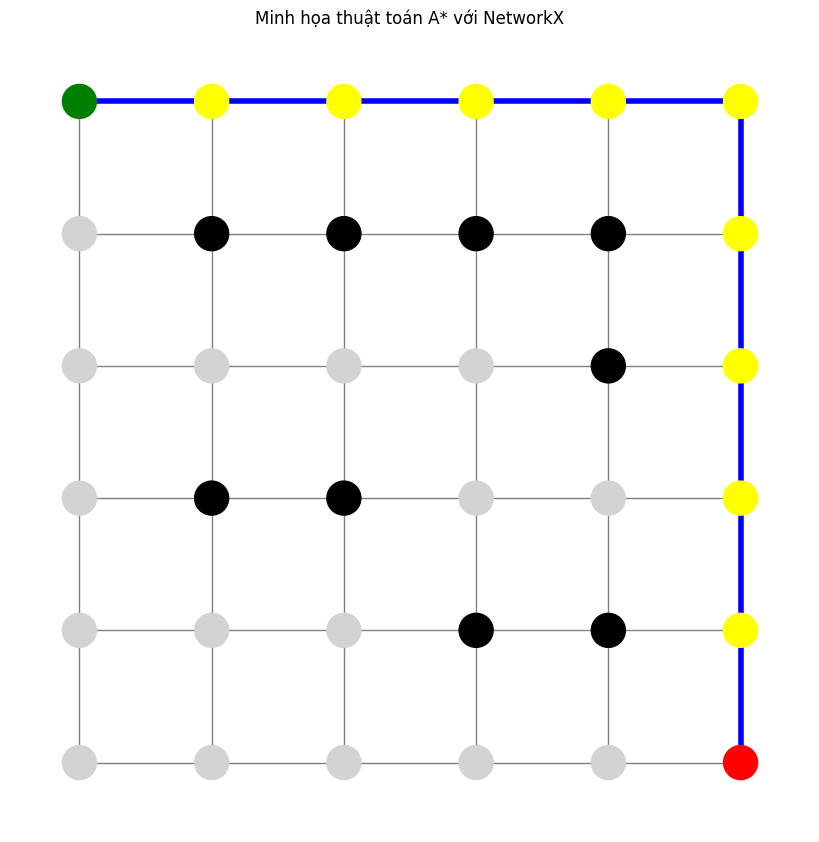

In [1]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt


# 1. Hàm đọc maze từ file
def load_maze(filename):
    with open(filename, "r") as f:
        # Đọc từng dòng, chuyển thành list các số nguyên
        maze = [[int(x) for x in line.split()] for line in f]
    return maze


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def a_star(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    openlist = []
    hq.heappush(openlist, (0, start))
    comefrom = {}
    g = {start: 0}

    while openlist:
        current_f, current = hq.heappop(openlist)

        if current == end:
            path = []
            while current in comefrom:
                path.append(current)
                current = comefrom[current]
            path.append(start)
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor[0]][neighbor[1]] == 1:
                    continue

                tentative_g = g[current] + 1
                if neighbor not in g or tentative_g < g[neighbor]:
                    comefrom[neighbor] = current
                    g[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, end)
                    hq.heappush(openlist, (f, neighbor))
    return None


# 3. Hàm minh họa bằng NetworkX
def visualize_path(maze, path):
    rows, cols = len(maze), len(maze[0])
    G = nx.grid_2d_graph(rows, cols)  # Tạo đồ thị lưới

    # Thiết lập vị trí các nút (đảo ngược y để giống ma trận)
    pos = {(x, y): (y, -x) for x, y in G.nodes()}

    # Xác định màu sắc cho các nút
    node_colors = []
    for node in G.nodes():
        if node == path[0]:
            node_colors.append("green")  # Bắt đầu
        elif node == path[-1]:
            node_colors.append("red")  # Đích
        elif node in path:
            node_colors.append("yellow")  # Đường đi
        elif maze[node[0]][node[1]] == 1:
            node_colors.append("black")  # Tường
        else:
            node_colors.append("lightgrey")  # Đường trống

    # Vẽ đồ thị
    plt.figure(figsize=(8, 8))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        with_labels=False,
        node_size=600,
        edge_color="gray",
    )

    # Vẽ các cạnh của đường đi đậm hơn
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="blue", width=4)

    plt.title("Minh họa thuật toán A* với NetworkX")
    plt.show()


# --- CHẠY CHƯƠNG TRÌNH ---
try:
    maze_data = load_maze("map.txt")
    start_node = (0, 0)
    end_node = (len(maze_data) - 1, len(maze_data[0]) - 1)

    final_path = a_star(maze_data, start_node, end_node)

    if final_path:
        print("Đường đi tìm được:", final_path)
        visualize_path(maze_data, final_path)
    else:
        print("Không tìm thấy đường đi!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'map.txt'. Hãy tạo file trước.")